In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
import zipfile
with zipfile.ZipFile("./data/train.txt.zip", "r") as zip_ref:
    zip_ref.extractall("./data/")

## 数据概况

In [3]:
# 读取数据
df = pd.read_csv('./data/userlostprob_train.txt', sep='\t')
df.head()

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0,24636,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.04,NaN,...,615.0,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12
1,1,24637,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.06,NaN,...,513.0,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14
2,0,24641,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.05,NaN,...,382.0,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19
3,0,24642,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.01,NaN,...,203.0,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16
4,1,24644,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.00,NaN,...,84.0,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21


In [4]:
# 查看每列数据
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689945 entries, 0 to 689944
Data columns (total 51 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   label                             689945 non-null  int64  
 1   sampleid                          689945 non-null  int64  
 2   d                                 689945 non-null  object 
 3   arrival                           689945 non-null  object 
 4   iforderpv_24h                     689945 non-null  int64  
 5   decisionhabit_user                385450 non-null  float64
 6   historyvisit_7ordernum            82915 non-null   float64
 7   historyvisit_totalordernum        386525 non-null  float64
 8   hotelcr                           689148 non-null  float64
 9   ordercanceledprecent              447831 non-null  float64
 10  landhalfhours                     661312 non-null  float64
 11  ordercanncelednum                 447831 non-null  f

In [5]:
# 查看数据形状
df.shape

(689945, 51)

In [6]:
# label分布
df.label.value_counts()

0    500588
1    189357
Name: label, dtype: int64

In [7]:
# 描述性统计
df.describe()

,label,sampleid,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
count,689945.000000,6.899450e+05,689945.000000,385450.000000,82915.000000,386525.000000,689148.000000,447831.000000,661312.000000,447831.000000,...,660664.000000,447831.000000,602960.000000,682274.000000,651263.000000,592818.000000,457896.000000,689945.000000,5.929100e+05,689945.000000
mean,0.274452,6.285402e+05,0.193737,5.317048,1.856094,11.710487,1.060996,0.342119,6.086366,154.179369,...,318.541812,101830.919400,0.368237,10.648278,2.253250,12049.409382,1.137476,153.702414,1.855185e+04,14.462315
std,0.446238,4.146815e+05,0.395226,38.524483,2.103862,17.251429,0.045264,0.354210,12.413225,398.456986,...,351.913035,122784.313864,0.219945,15.696682,3.538453,25601.374138,0.204789,277.807697,2.288603e+05,6.301575
min,0.000000,2.463600e+04,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.007000,0.007000,0.000000,1.000000,0.000000,1.000000e+00,0.000000
25%,0.000000,3.123200e+05,0.000000,2.000000,1.000000,2.000000,1.030000,0.000000,0.000000,0.000000,...,145.000000,14999.000000,0.170000,0.827000,0.127000,551.000000,1.000000,17.000000,4.710000e+02,11.000000
50%,0.000000,5.996370e+05,0.000000,3.000000,1.000000,6.000000,1.050000,0.250000,0.000000,2.000000,...,233.000000,46890.000000,0.400000,3.527000,0.627000,2848.000000,1.050000,62.000000,1.315000e+03,15.000000
75%,1.000000,8.874600e+05,0.000000,5.000000,2.000000,14.000000,1.090000,0.570000,4.000000,153.000000,...,388.000000,138953.000000,0.550000,13.327000,2.747000,10726.000000,1.210000,180.000000,3.141000e+03,20.000000
max,1.000000,2.238426e+06,1.000000,3167.000000,106.000000,711.000000,3.180000,1.000000,49.000000,13475.000000,...,43700.000000,527026.000000,0.990000,67.140000,14.507000,194386.000000,11.000000,9956.000000,9.651192e+06,23.000000


In [8]:
# 查看缺失值比例
df.isnull().mean().sort_values(ascending=True)

label                               0.000000
sid                                 0.000000
iforderpv_24h                       0.000000
h                                   0.000000
d                                   0.000000
sampleid                            0.000000
arrival                             0.000000
hotelcr                             0.001155
hoteluv                             0.001155
lowestprice                         0.002919
cityuvs                             0.011118
cancelrate                          0.016984
novoters                            0.024679
customereval_pre2                   0.041500
landhalfhours                       0.041500
uv_pre2                             0.041679
lowestprice_pre2                    0.042440
uv_pre                              0.042608
cr_pre                              0.042608
lowestprice_pre                     0.043853
novoters_pre2                       0.046857
cancelrate_pre                      0.053526
cityorders

## 数据分布

### 数据分布总览

In [9]:
# 数据分布偏态情况
df.skew().sort_values()

/var/folders/hg/0sb_bjrx0ps3_x7_3mdmb9rm0000gn/T/ipykernel_11509/2331538015.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew().sort_values()


delta_price1                       -48.892476
delta_price2                       -16.301581
firstorder_bu                       -1.522005
h                                   -0.665606
starprefer                          -0.361712
businessrate_pre2                   -0.109048
businessrate_pre                    -0.042611
customereval_pre2                   -0.033801
ordercanceledprecent                 0.655980
label                                1.010888
consuming_capacity                   1.029861
cancelrate_pre                       1.262474
sampleid                             1.342328
deltaprice_pre2_t1                   1.457223
price_sensitive                      1.504168
lasthtlordergap                      1.536367
iforderpv_24h                        1.549817
cr_pre                               1.776279
cityuvs                              2.034204
cityorders                           2.117058
landhalfhours                        2.178247
avgprice                          

当数据呈左右对称分布时，偏度系数等于0。偏度系数大于1或小于-1，视为严重偏斜分布；偏度系数为0.5～1或-1～-0.5，视为中等偏斜分布；偏度系数为**-0.5～0或0～0.5**，视为轻微偏斜分布。

由上面可以看出，除了businessrate_pre2, businessrate_pre, customereval_pre2，其他数据基本都呈很大的偏态分布。

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


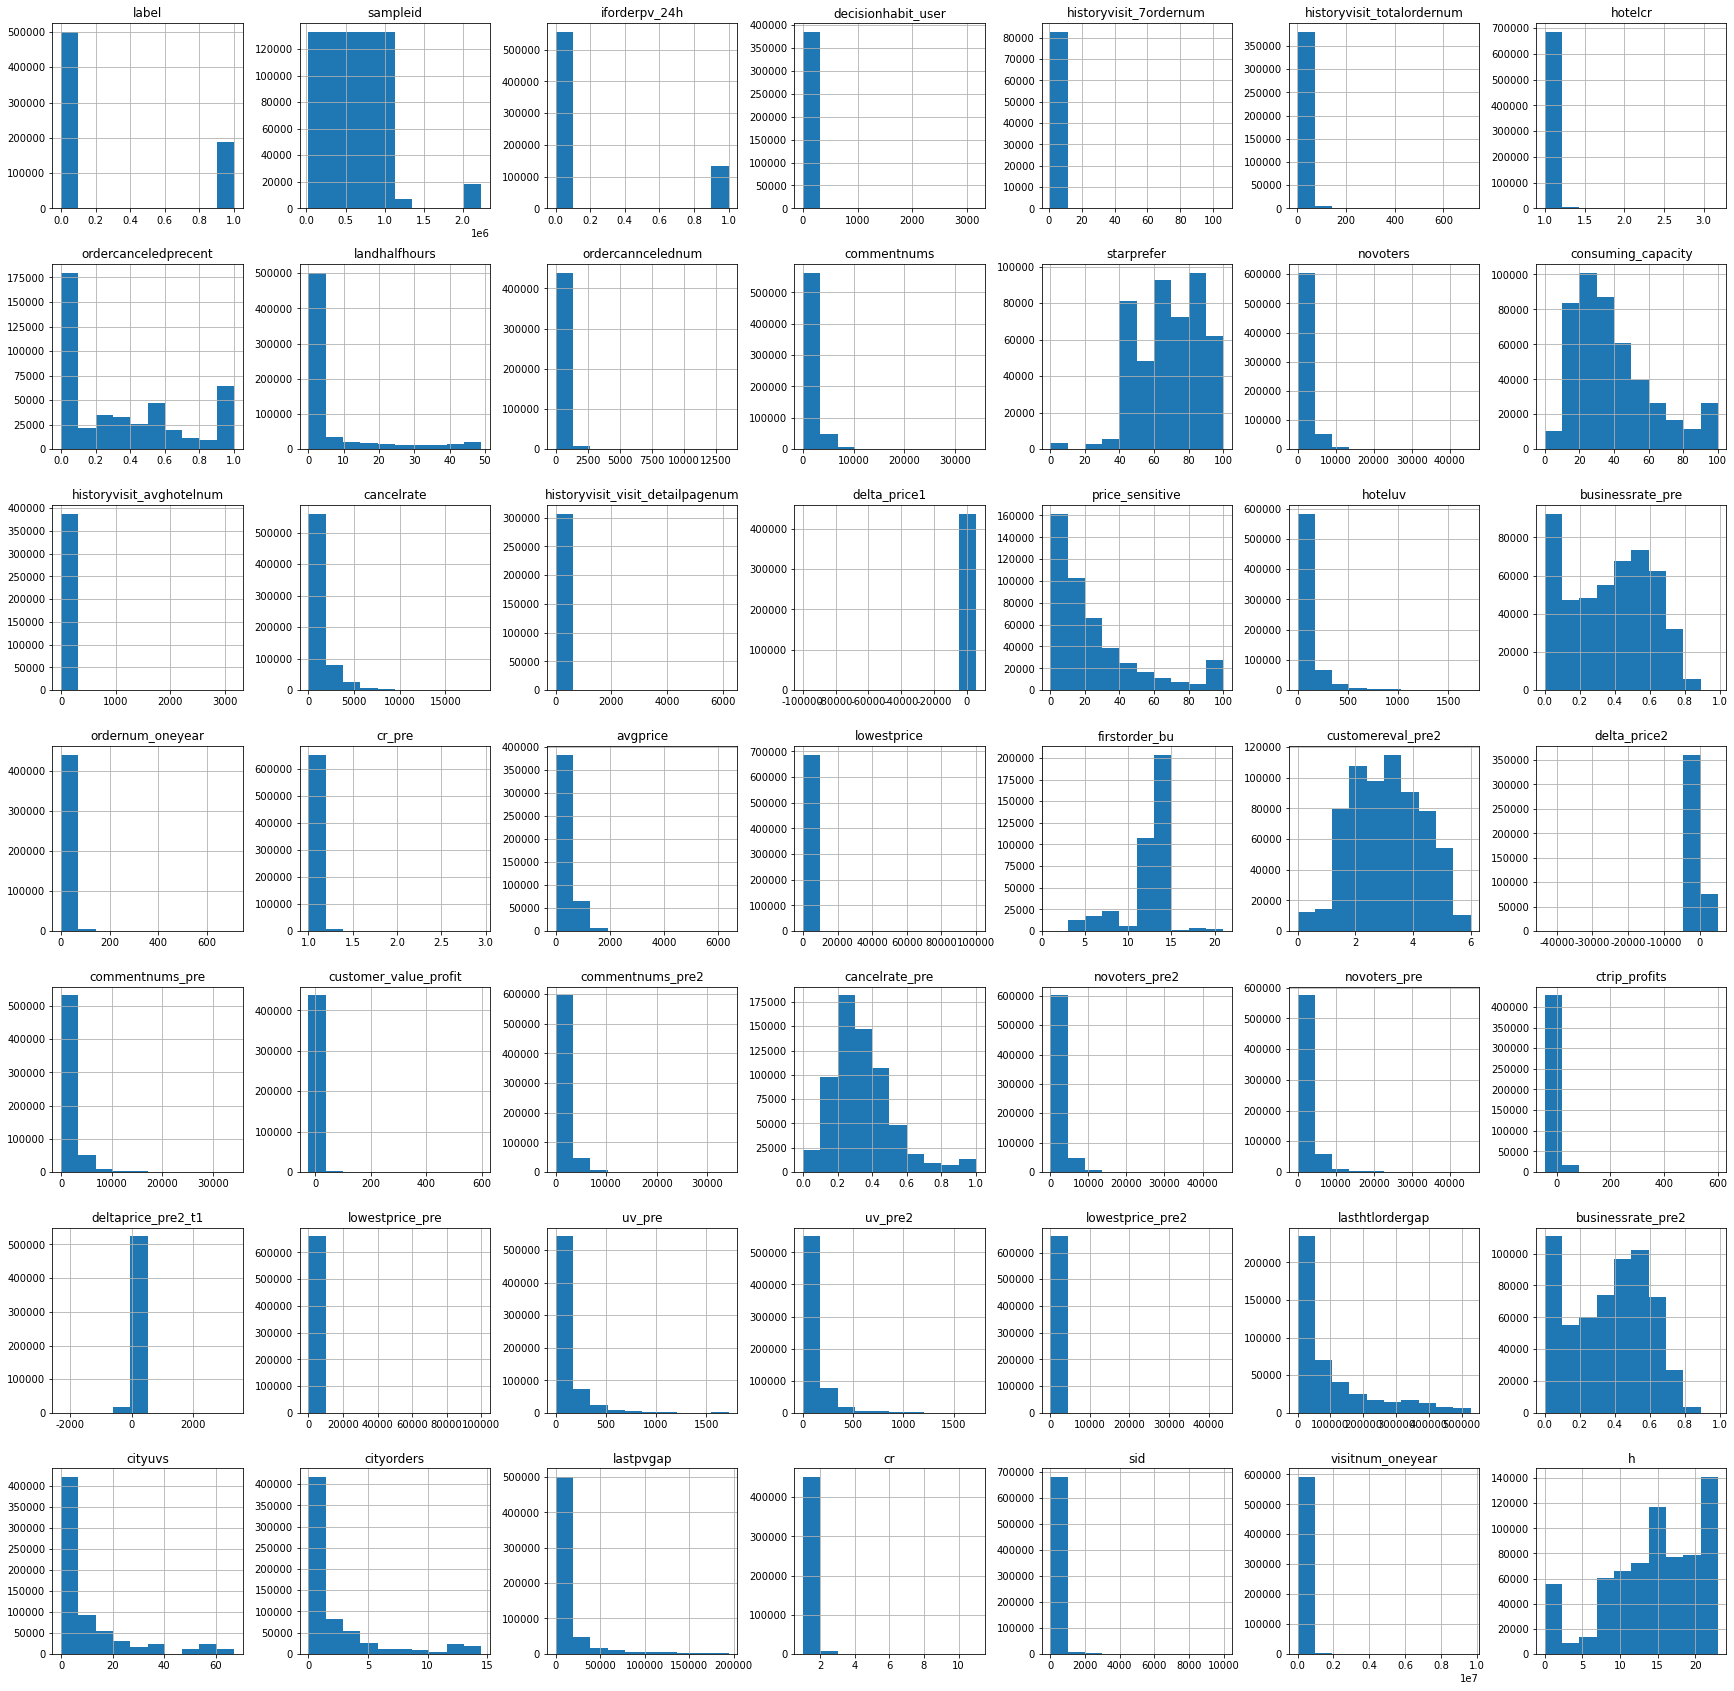

In [10]:
# 查看数据分布图
df.hist(figsize=(30,30))
plt.savefig('./images/data_distribution_raw.png')

### 预定日期和入住日期

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


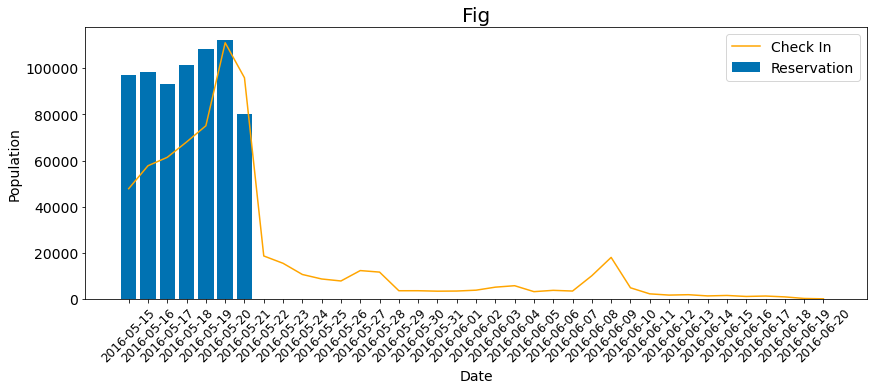

In [11]:
# copy
cdf = df.copy()

# 构建访问时间和到达时间的表格
cdf_d = cdf.d.value_counts().to_frame().reset_index()
cdf_arrival = cdf.arrival.value_counts().to_frame().reset_index()
time_table = cdf_d.merge(cdf_arrival, how='outer', on='index')
time_table.fillna(0, inplace=True)
time_table.set_index('index', inplace=True)
time_table.sort_index(inplace=True)

# 获取字段
x = time_table.index
y1 = time_table.arrival
y2 = time_table.d

plt.figure(figsize=(14, 5))
plt.style.use('seaborn-colorblind')
plt.plot(x, y1, c='orange', label='Check In')
plt.bar(x, y2, align='center', label='Reservation')
plt.title('Fig', fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.legend(fontsize=14)

由图看出，520前预定人数和入住人数逐渐攀升，在520当天达到峰值，过了521，入住人数断崖式下降，随后酒店入住人数较为稳定，后面的两个下波峰是由于周末的原因。

### 访问时间段

Text(0, 0.5, 'Population')

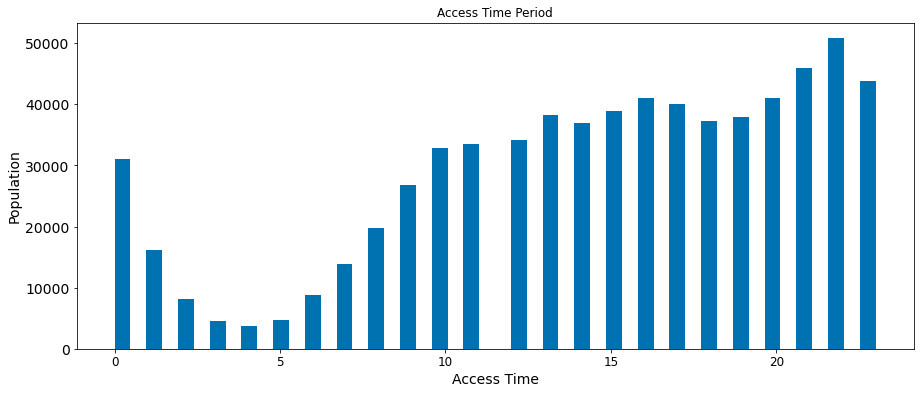

In [12]:
plt.figure(figsize=(15, 6))
plt.hist(cdf.h.dropna(), bins=48, align='mid')
plt.title('Access Time Period')
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Access Time', fontsize=14)
plt.ylabel('Population', fontsize=14)

由访问时间段可以看出，在 凌晨四五点的时候访问人数最少，此时大多数人在睡觉，因此这符合人的作息。随后访问人数在白天总体呈上升趋势，在17点-19点时稍微回落，因为此时是人的下班通勤时间或者晚饭时间，过了这段时间访问人数又开始逐渐上升，在22时达到峰值。

### 客户价值

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


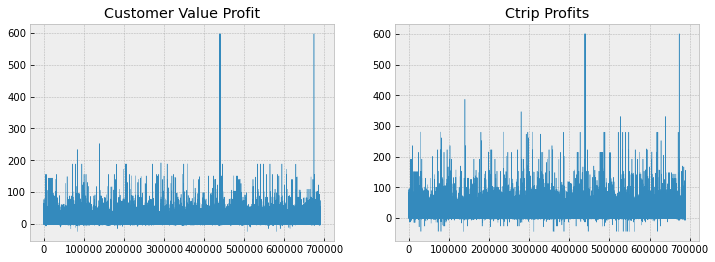

In [13]:
plt.figure(figsize=(12, 4))
plt.style.use('bmh')

# customer_value_profit 和 ctrip_profits 分布
plt.subplot(121)
plt.plot(cdf.index, cdf.customer_value_profit, linewidth=0.5)
plt.title('Customer Value Profit')

plt.subplot(122)
plt.plot(cdf.index, cdf.ctrip_profits, linewidth=0.5)
plt.title('Ctrip Profits')

plt.savefig('./images/profits.png')

- 客户近一年的价值图和客户价值图大体上很相似，大多数人分布在0~100的范围内。另外，由于两个特征分布上非常接近，后面可以对`customer_value_profit`和`ctrip_profits`进行相关性分析验证，如果相关系数很大，可以考虑进行PCA降维。
- 不排除有些客户价值非常大，峰值达到了600，这些客户都可以在之后的分析中重点观察，因为他们是非常有“价值”的。但是这些峰值过大的客户，数据可能存在极值点过大的情况，因此需要对数据进一步处理。
- 另外，可以看出，两个字段都存在部分数据的客户价值为负，这些是异常值，需要处理。

### 消费能力指数

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


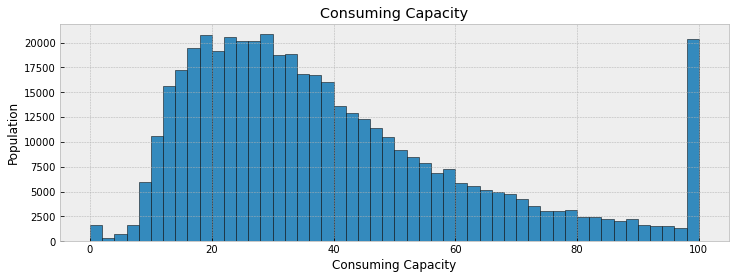

In [14]:
plt.figure(figsize=(12, 4))

plt.hist(df.consuming_capacity, bins=50, edgecolor='k')
plt.xlabel('Consuming Capacity')
plt.ylabel('Population')
plt.title('Consuming Capacity')
plt.savefig('./images/consuming_capacity.png')

我们可以看到，消费能力指数的值范围是0-100。消费能力指数值基本呈现一个右偏的正态分布，平均消费能力在30附近，我们也能看到消费能力达到近100的人数也特别多，达到了21000多人，从这一点上，我们可以看到，酒店的入住客户中仍然存在较大群体的富裕人士。

### 价格敏感指数分布

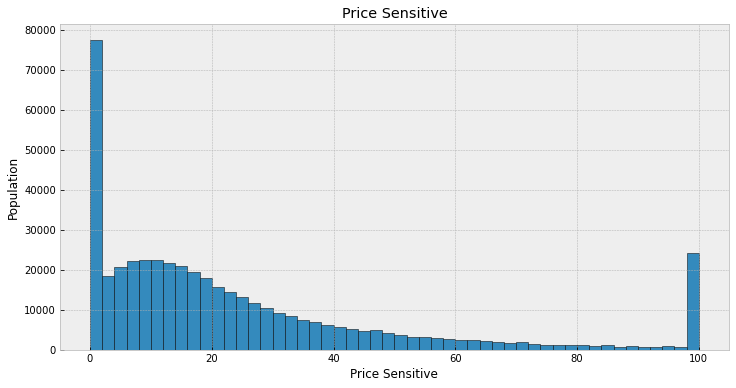

In [15]:
plt.figure(figsize=(12, 6))

plt.hist(df.price_sensitive.dropna(), bins=50, edgecolor='k')
plt.xlabel('Price Sensitive')
plt.ylabel('Population')
plt.title('Price Sensitive')
plt.savefig('./images/price_sensitive.png')

在价格敏感指数图中，出现两头存在极值现象，中间的分布也总体上呈现一个右偏正态分布，大部分人对价格并不敏感，对于这些用户来说，价格不是考虑的最重要因素。当然，我们也会发现，价格敏感指数为100时的人数也并不少，针对这一部分客户，我们可以考虑用一些打折优惠的方式吸引消费

### 入住酒店平均价格

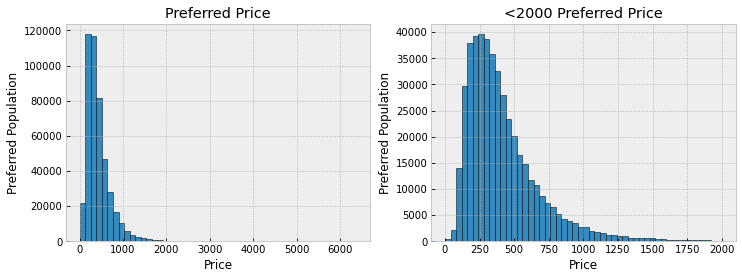

In [16]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(df.avgprice.dropna(), bins=50, edgecolor='k')
plt.xlabel('Price')
plt.ylabel('Preferred Population')
plt.title('Preferred Price')

# 由于酒店价格主要在2000以内，因此针对这个区间进行进一步可视化
plt.subplot(122)
plt.hist(df[df.avgprice<2000]['avgprice'].dropna(), bins=50, edgecolor='k')
plt.xlabel('Price')
plt.ylabel('Preferred Population')
plt.title('<2000 Preferred Price')
plt.savefig('./images/avgprice.png')

看出酒店价格偏好呈现一个正太分布微左偏态的分布，大多数人的价值偏好在150~600元之间，，在1500过后就没有什么人了。平均价格在250左右。

### 酒店星级偏好

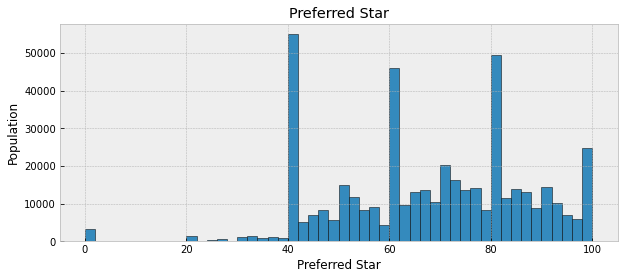

In [17]:
plt.figure(figsize=(10, 4))
plt.hist(df.starprefer.dropna(), bins = 50, edgecolor = 'k')
plt.xlabel('Preferred Star')
plt.ylabel('Population')
plt.title('Preferred Star')
plt.savefig('./images/starprefer.png')

分布规律性没有酒店价格偏好强，在40、60、80、100的分段存在极值情况，后面可以这些极值情况进行数据预处理。但总体来看，星级偏好主要集中在60~80之间。

### 订单取消率

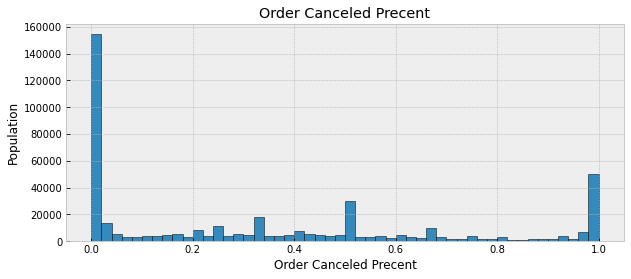

In [18]:
plt.figure(figsize=(10, 4))
plt.hist(df.ordercanceledprecent.dropna(), bins = 50, edgecolor = 'k')
plt.xlabel('Order Canceled Precent')
plt.ylabel('Population')
plt.title('Order Canceled Precent')
plt.savefig('./images/ordercanceledprecent.png')

存在大量的用户订单取消率为0的情况，说明大多数用户订了酒店后就会入住。而同时也存在部分极端用户，订单取消率为1的情况。订单取消率为0.5的用户第三多。

### 用户年订单数分布

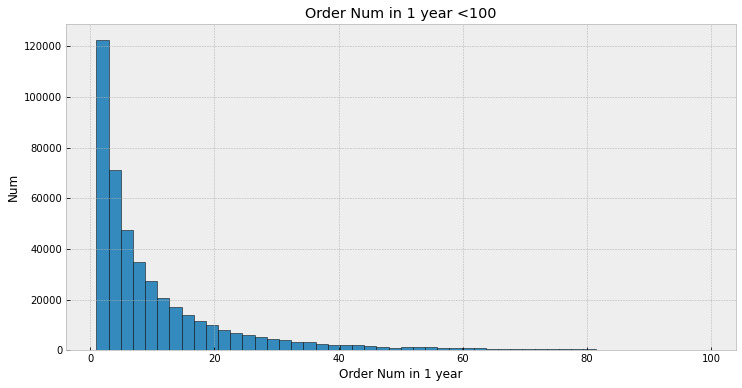

In [19]:
plt.figure(figsize=(12, 6))
plt.hist(df[df.ordernum_oneyear<100]['ordernum_oneyear'].dropna(), bins = 50, edgecolor = 'k')
plt.xlabel('Order Num in 1 year')
plt.ylabel('Num')
plt.title('Order Num in 1 year <100')
plt.savefig('./images/ordernum_oneyear<100.png')

绝大部分用户年订单数是小于50的，订单数在5次之内的人数占比比较大

### 新老客户流失率

/var/folders/hg/0sb_bjrx0ps3_x7_3mdmb9rm0000gn/T/ipykernel_11509/1976090166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_table['sid'] = np.where(s_table['sid']==1, 1, 0)  # 将sid处理为0和1两种情况，对应新客户和老客户
/var/folders/hg/0sb_bjrx0ps3_x7_3mdmb9rm0000gn/T/ipykernel_11509/1976090166.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_table['flag'] = 1


Text(0.5, 1.0, 'Churn rate in old and new customers')

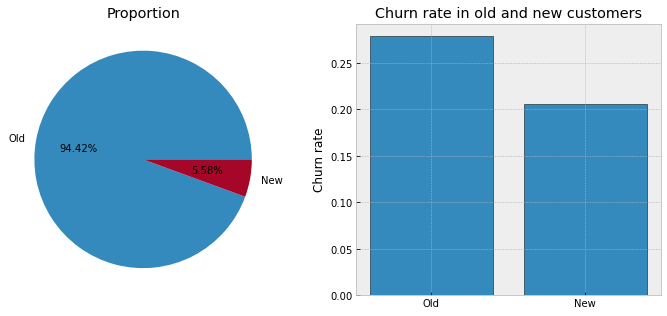

In [20]:
# 新老客户，可以由sid来判断。流失与否，用label来判断
# 计算新老用户流失率
s_table = cdf[['label','sid']]
s_table['sid'] = np.where(s_table['sid']==1, 1, 0)  # 将sid处理为0和1两种情况，对应新客户和老客户
s_table['flag'] = 1 
s = s_table.groupby('sid').sum().reset_index()  # 按照新老用户区分，label是流失和没流失的人数，flag是新、老用户数
s['rate'] = s['label'] / s['flag']  # 新老用户流失率

# 画图
# 新老客户占比
plt.figure(figsize=(12, 5))
plt.subplot(121)
percent=[s['flag'][0]/s['flag'].sum(), s['flag'][1]/s['flag'].sum()]
# color=['steelblue','lightskyblue']
label=['Old','New']
plt.pie(percent,autopct='%.2f%%',labels=label)
plt.title('Proportion')

# 流失率
plt.subplot(122)
plt.bar(s.sid, s.rate,align='center',tick_label=label,edgecolor = 'k')
plt.ylabel('Churn rate')
plt.title('Churn rate in old and new customers')

# 数据预处理

## 去除不需要的字段与重复字段

In [21]:
rawdf = df.copy()
drop_columns = ['sampleid', 'firstorder_bu']
rawdf.drop(drop_columns, axis=1, inplace=True)

rawdf.drop_duplicates(inplace=True)

## 数据类型转换
时间特征处理
访问日期d和入住日期arrival字段为字符串类型，从实际意义来看，将其转换为星期几的int类型是种更好的方式。

另外是否为周末对实际的用户行为影响颇大，需新增判断是否为周末的特征列。

另外预定与入住间隔时间越久，用户的决策受影响的风先越大，所以也新构造关于间隔天数的特征列。

In [22]:
# 将两个日期变量由字符串转换为日期格式
rawdf['arrival'] = pd.to_datetime(rawdf['arrival'] )
rawdf['d'] = pd.to_datetime(rawdf['d'])

# 生成提前预定天数（衍生变量）（到达日期-访问日期间隔）（看提前多少天订）
rawdf['day_advanced'] = (rawdf['arrival']-rawdf['d']).dt.days

# 时间格式
rawdf['d'] = pd.to_datetime(df['d'], format = '%Y-%m-%d')
rawdf['arrival'] = pd.to_datetime(df['arrival'], format='%Y-%m-%d')

# 用户周几入住
rawdf['arrival_weekday'] = rawdf['arrival'].map(lambda x:x.weekday())

# 用户入住那天是否为休息日
def is_weekend(a):
    if int(a) in [0,1,2,3,4]:
        return 0 # 0代表是工作日
    else:
        return 1 # 1代表是周末

rawdf['is_arrival_weekend'] = rawdf['arrival_weekday'].map(lambda x: is_weekend(x))

rawdf.drop(labels=['d','arrival'], axis=1, inplace=True)

## 异常值处理

### 负数处理
结合探索性分析中观察到的可视化图，
- `delta_price1`（用户偏好价格-24h浏览最多酒店价格）、`delta_price2`（用户偏好价格-24h浏览酒店平均价格）、`lowestprice`（当前酒店可定最低价格）三者理论上酒店价格不可能为负，并且由可视化图观察到数据分布比较集中，因此负值采取中位数处理。
- `customer_value_profit`（客户价值_近1年）、`ctrip_profits`(客户价值)也不应该为负值，结合可视化数据分布图看出它们的分布较为分散，因此将其填充为0

In [23]:
filter_one=['customer_value_profit','ctrip_profits']
filter_two=['delta_price1','delta_price2','lowestprice']

for f in filter_one:
    rawdf.loc[rawdf[f]<0, f] = 0

for f in filter_two:
    rawdf.loc[rawdf[f]<0, f] = rawdf[f].median()
    
rawdf[['customer_value_profit','ctrip_profits','delta_price1','delta_price2','lowestprice']].describe()

,customer_value_profit,ctrip_profits,delta_price1,delta_price2,lowestprice
count,438351.000000,444380.000000,436364.000000,436965.000000,682514.000000
mean,3.053405,4.231360,185.570443,165.940583,318.623854
std,6.620095,9.298553,220.462962,208.582383,577.351226
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.269000,0.340000,81.000000,69.000000,116.000000
50%,0.991000,1.347000,81.000000,69.000000,200.000000
75%,3.139000,4.320000,226.000000,198.000000,380.000000
max,598.064000,600.820000,5398.000000,5114.000000,100000.000000


### 极值处理
由探索性分析中数据分布情况害能看出，较多特征有极大和极小的异常值，比如上文可视化的`customer_value_profit`，`ctrip_profits`，`starprefer`等。因此对所有字段使用1%和99%分位数替换超过上下线的值。

In [24]:

for i in rawdf.columns:
    value_1_percent =  np.percentile(rawdf[i], 1)  # # 1%的值
    value_99_percent = np.percentile(rawdf[i], 99) # 99%的值
    
    rawdf.loc[rawdf[i]<value_1_percent, i] = value_1_percent
    rawdf.loc[rawdf[i]>value_99_percent, i] = value_99_percent

# 查看表现
rawdf.skew().sort_values()

h                                   -0.666982
starprefer                          -0.361818
arrival_weekday                     -0.186895
businessrate_pre2                   -0.108628
businessrate_pre                    -0.042588
customereval_pre2                   -0.032924
ordercanceledprecent                 0.655864
is_arrival_weekend                   0.986184
label                                1.002219
consuming_capacity                   1.029724
cancelrate_pre                       1.261816
deltaprice_pre2_t1                   1.455136
price_sensitive                      1.504156
lasthtlordergap                      1.536395
iforderpv_24h                        1.564425
cr_pre                               1.778698
cityuvs                              2.033030
day_advanced                         2.074114
cityorders                           2.115288
landhalfhours                        2.196870
sid                                  2.679949
avgprice                          

## 缺失值处理
常用缺失值处理方法
- 不处理（针对类似 XGBoost 等树模型）；
- 删除（缺失数据太多）；
- 插值补全，包括均值/中位数/众数/建模预测/多重插补/压缩感知补全/矩阵补全等；
- 分箱，缺失值一个箱；

### 删除
对于缺失率>80%的特征，删除对应的字段与特征

In [25]:
print('原来数据维度是:{}'.format(rawdf.shape))

# 定义删除空值行列的函数
def nan_drop(df,axi, rate=0.5):
    # rawdf.shape[1-0]是比如，如果要删除的是行，则看列的数量，然后*比率，即改行有多少列是缺失的
    # 反过来，如果要删除的是列，则看行的数量*比率，即该列有多少行缺失，从而删除
    # thresh是至少有多少存在则保留，否则删除
    df.dropna(axis=axi, how='any', thresh=df.shape[1-axi]*rate, inplace=True)

# 删除缺失值比例大于80%的行和列
nan_drop(rawdf, axi=0, rate=0.2)
nan_drop(rawdf, axi=1, rate=0.2)

print('删除缺失率较多的字段后的维度是:{}'.format(rawdf.shape))

原来数据维度是:(684406, 50)
删除缺失率较多的字段后的维度是:(684401, 49)


### 填充
对于缺失值小于80%的字段，结合数据分布形态填充。服从正态分布的使用均值填充，呈偏态分布的，使用中位数填充。

In [26]:
# 查看含有缺数的数据的偏态
rawdf.skew()[rawdf.isnull().mean(0)>0].sort_values()  # 查看含有缺数的数据的偏态

starprefer                          -0.361818
businessrate_pre2                   -0.108628
businessrate_pre                    -0.042588
customereval_pre2                   -0.032924
ordercanceledprecent                 0.655864
consuming_capacity                   1.029724
cancelrate_pre                       1.261816
deltaprice_pre2_t1                   1.455136
price_sensitive                      1.504156
lasthtlordergap                      1.536395
cr_pre                               1.778698
cityuvs                              2.033030
cityorders                           2.115288
landhalfhours                        2.196870
avgprice                             2.698799
hotelcr                              2.706416
cancelrate                           3.707172
lastpvgap                            3.862592
delta_price1                         3.906158
uv_pre2                              3.952352
delta_price2                         4.184307
uv_pre                            

由数据偏态信息可知，对`starprefer`、`businessrate_pre2`、`businessrate_pre`、`customereval_pre2`、 `ordercanceledprecent`、`consuming_capacity`、`cancelrate_pre`进行均值填充。
对其他缺失的列进行中位数填充。

In [27]:
# 正态分布字段用均值填充
def nan_fill(df):
    filter_mean = ["businessrate_pre2","cancelrate_pre",
      "businessrate_pre",'starprefer','cancelrate_pre',
      'customereval_pre2','ordercanceledprecent',
      'consuming_capacity']
    for col in df.columns:
        if col in filter_mean:
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].median())
    return df

rawdf = nan_fill(rawdf)

# 特征工程

### 相关性分析
对用户特征相关分析

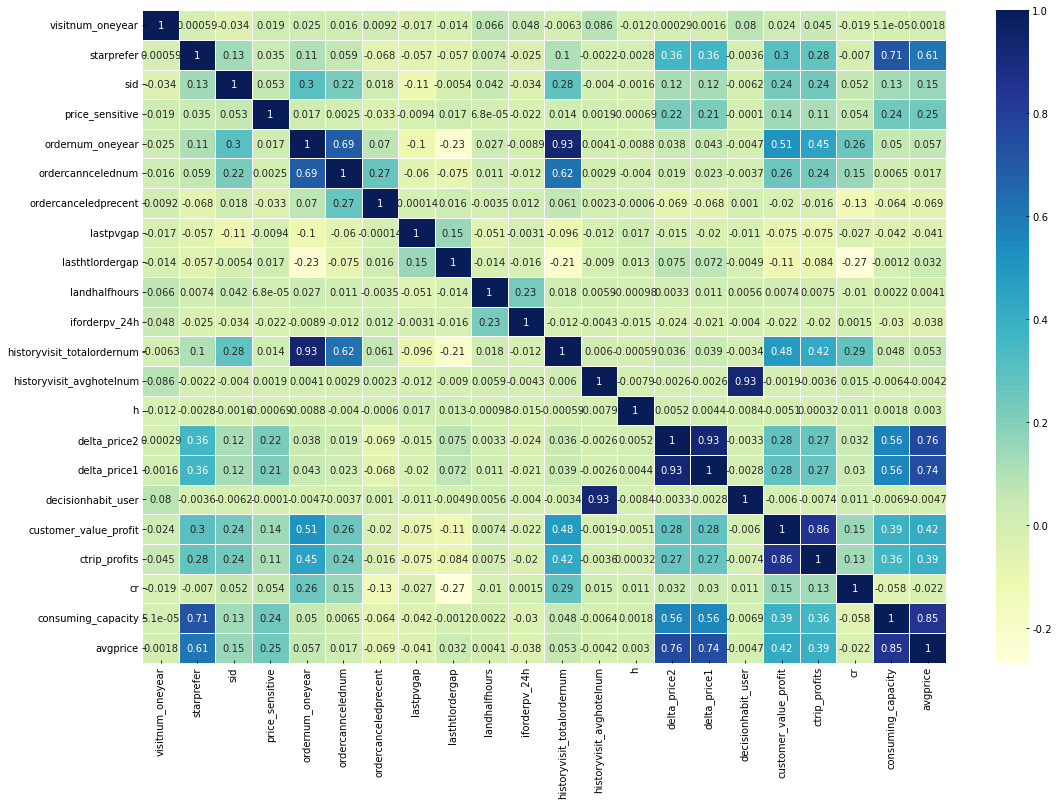

In [28]:
# 用户特征提取
user_features=['visitnum_oneyear','starprefer','sid','price_sensitive','ordernum_oneyear','ordercanncelednum','ordercanceledprecent','lastpvgap',
               'lasthtlordergap','landhalfhours','iforderpv_24h','historyvisit_totalordernum','historyvisit_avghotelnum','h',
               'delta_price2','delta_price1','decisionhabit_user','customer_value_profit','ctrip_profits','cr','consuming_capacity','avgprice']

# 生成用户特征的相关性矩阵
corr_mat = rawdf[user_features].corr()

# 绘制用户特征的相关性矩阵热度图
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(corr_mat, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap="YlGnBu")
plt.savefig('./images/user_features_analysis.png', dpi=400, bbox_inches='tight')
plt.show()

从热图中看出：
- `delta_price1`和`delta_price2`的相关性高达0.93，前者表示用户偏好价格-24小时浏览最多酒店价格，后者表示用户偏好价格-24小时浏览酒店平均价格，说明浏览24小时内浏览最多的酒店价格会影响到浏览酒店的平均价格，这可以理解为众数和平均数的关系。因此可以选择PCA提取一个主成分表示用户价格偏好。
- `ordernum_oneyear`和`historyvisit_totalordernum`的相关性高达0.93，两者都是表示用户1年内订单数，特征选取时可以只选择其一，这里选择`ordernum_oneyear`作为用户年订单数的特征，也可以用PCA降维；
- `decisionhabit_user`和`historyvisit_avghotelnum`的相关性达到了0.93，前者表示用户决策习惯，后者表示近三个月用户日均访问酒店数。说明决策时间久的用户近三个月访问酒店数的平均影响也越多，反过来也是，访问的酒店越多，该用户决策时间越久。
- `customer_value_profit`和`ctrip_profits`之间的相关性达到了0.86，前者表示用户近一年的价值，后者也表示用户价值，细分区别在于衡量的时间长度不同，这里也选择PCA提取一个主成分表示用户价值。
- `consuming_capacity`和`avgprice`之间的相关性达到了0.85，前者表示用户消费能力指数，后者表示酒店平均价格。很明显，消费能力越高，所选择的酒店平均价格大概率也越高。这里选择`consuming_capacity`来代表用户消费能力特征，也可以考虑用PCA降维综合这两个特征。

酒店信息特征的相关性分析

/var/folders/hg/0sb_bjrx0ps3_x7_3mdmb9rm0000gn/T/ipykernel_11509/3789297172.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "vdpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./images/hotel_features_analysis.png',vdpi=400, bbox_inches='tight')


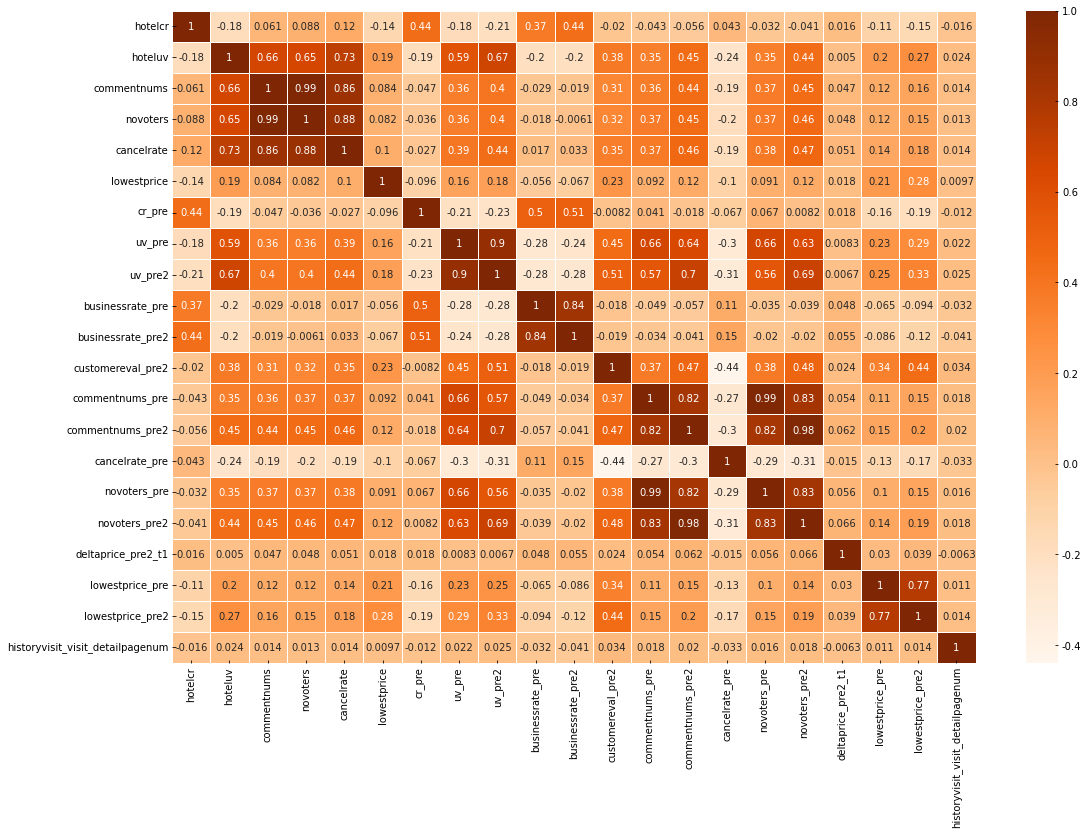

In [29]:
# 酒店信息特征相关性分析

# 酒店特征
hotel_features=['hotelcr','hoteluv','commentnums','novoters','cancelrate','lowestprice','cr_pre','uv_pre','uv_pre2','businessrate_pre',
                'businessrate_pre2','customereval_pre2','commentnums_pre','commentnums_pre2','cancelrate_pre','novoters_pre','novoters_pre2',
                'deltaprice_pre2_t1','lowestprice_pre','lowestprice_pre2','historyvisit_visit_detailpagenum']

# 生成酒店特征的相关性矩阵
corr_mat1 = rawdf[hotel_features].corr()

# 画图
fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corr_mat1, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap='Oranges')
plt.savefig('./images/hotel_features_analysis.png',vdpi=400, bbox_inches='tight')
plt.show()

- `novoters`和`commentnums`的相关性高达0.99，两个特征高度相关。因此取`commentnums`特征进入后续的预测与分析就好，或者选择PCA提取一个主成分表示酒店评论数
- `cencelrate`和`commentnums`三者的相关性也很高达到了0.86，可以看出酒店的评论数和取消率有很高的关系，可能是由于用户选择酒店后会查看酒店的相关评价，酒店的评论信息越多，用户对酒店也越了解，因此退订数量越少。因此要鼓励用户对酒店进行评价。
- `uv_pre`和`uv_pre2`的相关性达到了0.9，它们都表示24小时历史浏览次数最多的酒店的独立访客数信息，因此可以选择PCA提取一个主成分分析表示4小时历史浏览次数最多的酒店的独立访客数信息。
- `commentnums_pre`和`novoters_pre`的相关性高达0.99，两个特征高度相关。因此选择PCA提取一个主成分表示24小时历史浏览次数最多酒店点评数。
- `commentnums_pre2`和`novoters_pre2`的相关性高达0.99，两个特征高度相关。因此选择PCA提取一个主成分表示24小时历史浏览次数最多酒店点评数均值。

订单字段相关性分析


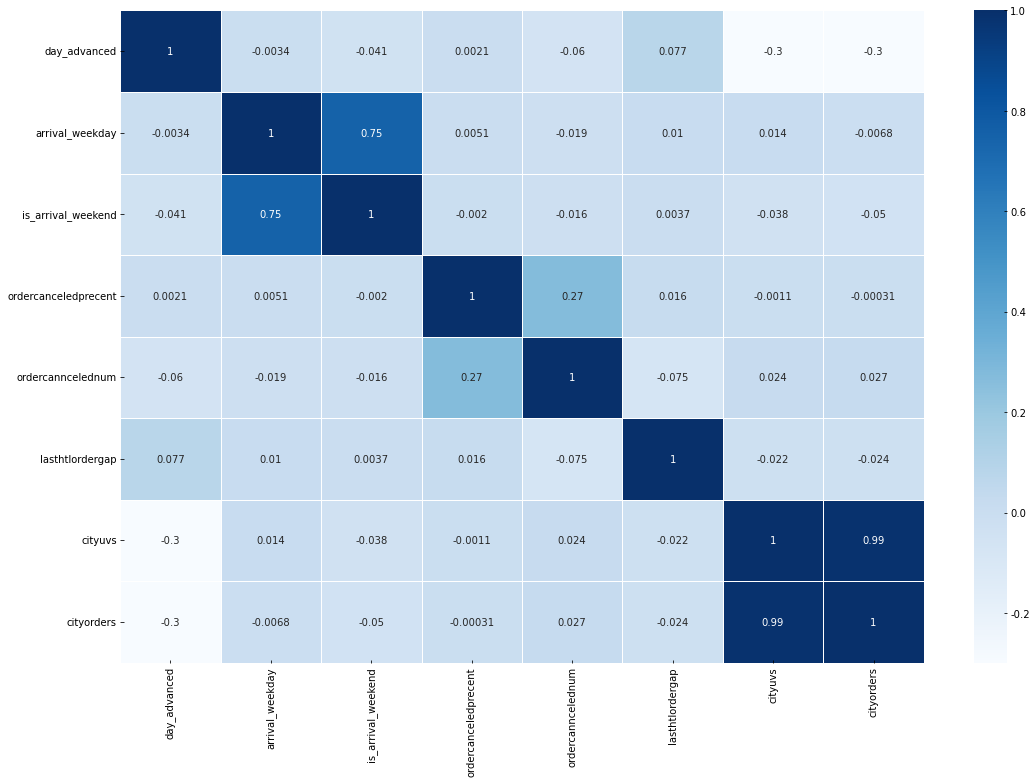

In [30]:
order_features = [ 'day_advanced', 'arrival_weekday', 'is_arrival_weekend' ,'ordercanceledprecent' ,'ordercanncelednum', 
         'lasthtlordergap', 'cityuvs', 'cityorders']

order_corr=rawdf[order_features].corr()   

# 画图
fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(order_corr, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap='Blues')
plt.savefig('./images/order_features_analysis.png',dpi=400, bbox_inches='tight')
plt.show()

同理，看出cityorders和cityuvs存在0.99的相关性，需要PCA降维

## 降维
降维是指在某些限定条件下，降低随机变量（特征）个数，得到一组“不相关”主变量的过程。这里使用主成分分析（PCA） 对相关度大于0.8的变量进行降维。

由上图的相关性分析矩阵，我们分别筛选用户和酒店很相关的维度进行降维度。

In [31]:
c_value=['customer_value_profit', 'ctrip_profits']                   # 用户价值维度
consume_level=['avgprice', 'consuming_capacity']                     # 用户消费水平
price_prefer=['delta_price1', 'delta_price2']                        # 用户偏好价格
ordernum_1_year=['ordernum_oneyear', 'historyvisit_totalordernum']# 用户一年历史订单数

hotel_hot=['commentnums', 'novoters']                                # 酒店热度
hotel_hot_pre=['commentnums_pre', 'novoters_pre']                    # 24h内浏览次数最多的酒店热度
hotel_hot_pre2=['commentnums_pre2', 'novoters_pre2']                 # 24h内酒浏览酒店的平均热度
hotel_uv_pre=['uv_pre', 'uv_pre2']                                # 24小时历史浏览次数最多的酒店的独立访客数

order_cityuvs_orders=['cityorders', 'cityuvs']                     # 昨日访问当前城市同入住日期的app uv数和订单数

In [32]:
from sklearn.decomposition import PCA

pca=PCA(n_components=1)
rawdf['c_value']=pca.fit_transform(rawdf[c_value])
rawdf['consume_level']=pca.fit_transform(rawdf[consume_level])
rawdf['price_prefer']=pca.fit_transform(rawdf[price_prefer])
rawdf['ordernum_1_year'] = pca.fit_transform(rawdf[ordernum_1_year])
rawdf['hotel_hot']=pca.fit_transform(rawdf[hotel_hot])
rawdf['hotel_hot_pre']=pca.fit_transform(rawdf[hotel_hot_pre])
rawdf['hotel_hot_pre2']=pca.fit_transform(rawdf[hotel_hot_pre2])
rawdf['hotel_uv_pre']=pca.fit_transform(rawdf[hotel_uv_pre])
rawdf['order_cityuvs_orders']=pca.fit_transform(rawdf[order_cityuvs_orders])

rawdf.drop(c_value, axis=1, inplace=True)
rawdf.drop(consume_level, axis=1, inplace=True)
rawdf.drop(price_prefer, axis=1, inplace=True)
rawdf.drop(ordernum_1_year, axis=1, inplace=True)
rawdf.drop(hotel_hot, axis=1, inplace=True)
rawdf.drop(hotel_hot_pre, axis=1, inplace=True)
rawdf.drop(hotel_hot_pre2, axis=1, inplace=True)
rawdf.drop(hotel_uv_pre, axis=1, inplace=True)
rawdf.drop(order_cityuvs_orders, axis=1, inplace=True)

print('PCA降维后维度是:{}'.format(rawdf.shape))  # (684128, 40)

PCA降维后维度是:(684401, 40)


## 数据标准化与归一化

In [33]:
from sklearn.preprocessing import StandardScaler

y = rawdf['label']
x = rawdf.drop('label', axis=1)

scaler = StandardScaler()
scaler.fit(x)

X = scaler.transform(x)


# 建模预测

In [34]:
# 数据准备
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

## 逻辑回归

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_prob = lr.predict_proba(X_test)[:, 1]  # 预测1类的概率
y_pred = lr.predict(X_test)  # 模型对测试集的预测结果
print(y_prob)
print(y_pred)

fpr_lr, tpr_lr, threshold_lr = metrics.roc_curve(y_test, y_prob)  # # 获取真阳率、伪阳率、阈值
auc_lr = metrics.auc(fpr_lr, tpr_lr)
score_lr = metrics.accuracy_score(y_test, y_pred)

print('模型准确率为:{0}, AUC得分为:{1}'.format(score_lr, auc_lr)  )
print(classification_report(y_test, y_pred))


[0.18596809 0.27885378 0.6011606  ... 0.14813418 0.08282185 0.26095122]
[0 0 1 ... 0 0 0]
模型准确率为:0.7363037967285452, AUC得分为:0.693483955774075
              precision    recall  f1-score   support

           0       0.75      0.96      0.84     99206
           1       0.58      0.15      0.24     37675

    accuracy                           0.74    136881
   macro avg       0.66      0.55      0.54    136881
weighted avg       0.70      0.74      0.67    136881



## 朴素贝叶斯

In [36]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()                                                # 实例化一个LR模型
gnb.fit(X_train, y_train)                                          # 训练模型
y_prob = gnb.predict_proba(X_test)[:,1]                           # 预测1类的概率
y_pred = gnb.predict(X_test)                                      # 模型对测试集的预测结果
fpr_gnb, tpr_gnb, threshold_gnb = metrics.roc_curve(y_test, y_prob)  # 获取真阳率、伪阳率、阈值
auc_gnb = metrics.auc(fpr_gnb, tpr_gnb)                            # AUC得分
score_gnb = metrics.accuracy_score(y_test, y_pred)                 # 模型准确率


print('模型准确率为:{0},AUC得分为:{1}'.format(score_gnb, auc_gnb))
print('============================================================')
print(classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2))


模型准确率为:0.6059277766819354,AUC得分为:0.6623997113056433
              precision    recall  f1-score   support

           0       0.82      0.59      0.68     99206
           1       0.38      0.65      0.48     37675

    accuracy                           0.61    136881
   macro avg       0.60      0.62      0.58    136881
weighted avg       0.69      0.61      0.63    136881



## 支持向量机

In [37]:
from sklearn.svm import SVC


svc = SVC(kernel='rbf', C=1, max_iter=100 ).fit(X_train, y_train) # 径向基核函数，C是惩罚项，max_iter最大迭代次数，gamma, coef也常用
y_prob = svc.decision_function(X_test)
y_pred = svc.predict(X_test)
fpr_svc, tpr_svc, threshold_svc = metrics.roc_curve(y_test, y_prob)
auc_svc = metrics.auc(fpr_svc, tpr_svc)
score_svc = metrics.accuracy_score(y_test, y_pred)
print('模型准确率为:{0},AUC得分为:{1}'.format(score_svc, auc_svc))
print('============================================================')
print(classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2))

/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


模型准确率为:0.5620648592573111,AUC得分为:0.49870714709029906
              precision    recall  f1-score   support

           0       0.72      0.64      0.68     99206
           1       0.27      0.35      0.31     37675

    accuracy                           0.56    136881
   macro avg       0.50      0.50      0.49    136881
weighted avg       0.60      0.56      0.58    136881



## 决策树

In [38]:
from sklearn import tree

dtc=tree.DecisionTreeClassifier()                              # 建立决策树模型
dtc.fit(X_train, y_train)                                        # 训练模型
y_prob=dtc.predict_proba(X_test)[:,1]                          # 预测1类的概率
y_pred=dtc.predict(X_test)                                     # 模型对测试集的预测结果 
fpr_dtc, tpr_dtc, threshod_dtc=metrics.roc_curve(y_test, y_prob)  # 获取真阳率、伪阳率、阈值
score_dtc=metrics.accuracy_score(y_test, y_pred)                
auc_dtc=metrics.auc(fpr_dtc, tpr_dtc) 
print('模型准确率为:{0},AUC得分为:{1}'.format(score_dtc, auc_dtc))
print('============================================================')
print(classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2))

模型准确率为:0.8777551303687144,AUC得分为:0.8513984219841575
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     99206
           1       0.77      0.79      0.78     37675

    accuracy                           0.88    136881
   macro avg       0.85      0.85      0.85    136881
weighted avg       0.88      0.88      0.88    136881



## 随机森林

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()                                     # 建立随机森林分类器
rfc.fit(X_train, y_train)                                           # 训练随机森林模型
y_prob=rfc.predict_proba(X_test)[:, 1]                            # 预测1类的概率
y_pred=rfc.predict(X_test)                                         # 模型对测试集的预测结果
fpr_rfc,tpr_rfc,threshold_rfc=metrics.roc_curve(y_test, y_prob)   # 获取真阳率、伪阳率、阈值  
auc_rfc=metrics.auc(fpr_rfc, tpr_rfc)                             # AUC得分
score_rfc=metrics.accuracy_score(y_test, y_pred)                  # 模型准确率
print('模型准确率为:{0},AUC得分为:{1}'.format(score_rfc, auc_rfc))
print('============================================================')
print(classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2))

模型准确率为:0.9234298405184065,AUC得分为:0.9725589495123463
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     99206
           1       0.97      0.74      0.84     37675

    accuracy                           0.92    136881
   macro avg       0.94      0.87      0.90    136881
weighted avg       0.93      0.92      0.92    136881



## XGBoost

In [40]:
import xgboost as xgb

# 读取训练集和测试集
dtrain=xgb.DMatrix(X_train, y_train)
dtest=xgb.DMatrix(X_test)

# 设置xgboost建模参数
params={'booster':'gbtree', 'objective':'binary:logistic', 'eval_metric':'auc',
    'max_depth':8, 'gamma':0, 'lambda':2, 'subsample':0.7, 'colsample_bytree':0.8,
    'min_child_weight':3, 'eta':0.2, 'nthread':8, 'silent':1}

# 训练模型
watchlist=[(dtrain, 'train')]
bst=xgb.train(params, dtrain, num_boost_round=100, evals=watchlist)

#  输入预测为正确的概率
y_prob=bst.predict(dtest)
# 设置阈值为0.5，得到测试集的测试结果
y_pred=(y_pred>=0.5)*1


# 获取真阳率、伪阳率、阈值
fpr_xgb, tpr_xgb, threshold_xgb=metrics.roc_curve(y_test, y_prob)   
auc_xgb=metrics.auc(fpr_xgb, tpr_xgb)    # AUC得分
score_xgb=metrics.accuracy_score(y_test, y_pred)    # 模型准确率
print('模型准确率为:{0},AUC得分为:{1}'.format(score_xgb, auc_xgb))
print('============================================================')
print(classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2))

/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[18:39:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.71806
[1]	train-auc:0.73673
[2]	train-auc:0.74233
[3]	train-auc:0.74796
[4]	train-auc:0.75335
[5]	train-auc:0.75825
[6]	train-auc:0.76128
[7]	train-auc:0.76492
[8]	train-auc:0.76768
[9]	train-auc:0.76951
[10]	train-auc:0.77274
[11]	train-auc:0.77561
[12]	train-auc:0.77830
[13]	train-auc:0.78137
[14]	train-auc:0.78363
[15]	train-auc:0.78515
[16]	train-auc:0.78755
[17]	train-auc:0.79046
[18]	train-auc:0.79338
[19]	train-auc:0.79537
[20]	train-auc:0.79639
[21]	train-auc:0.79868
[22]	train-auc:0.80122
[23]	train-auc:0.80320
[24]	train-auc:0.80509
[25]	train-au

## 模型比较

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


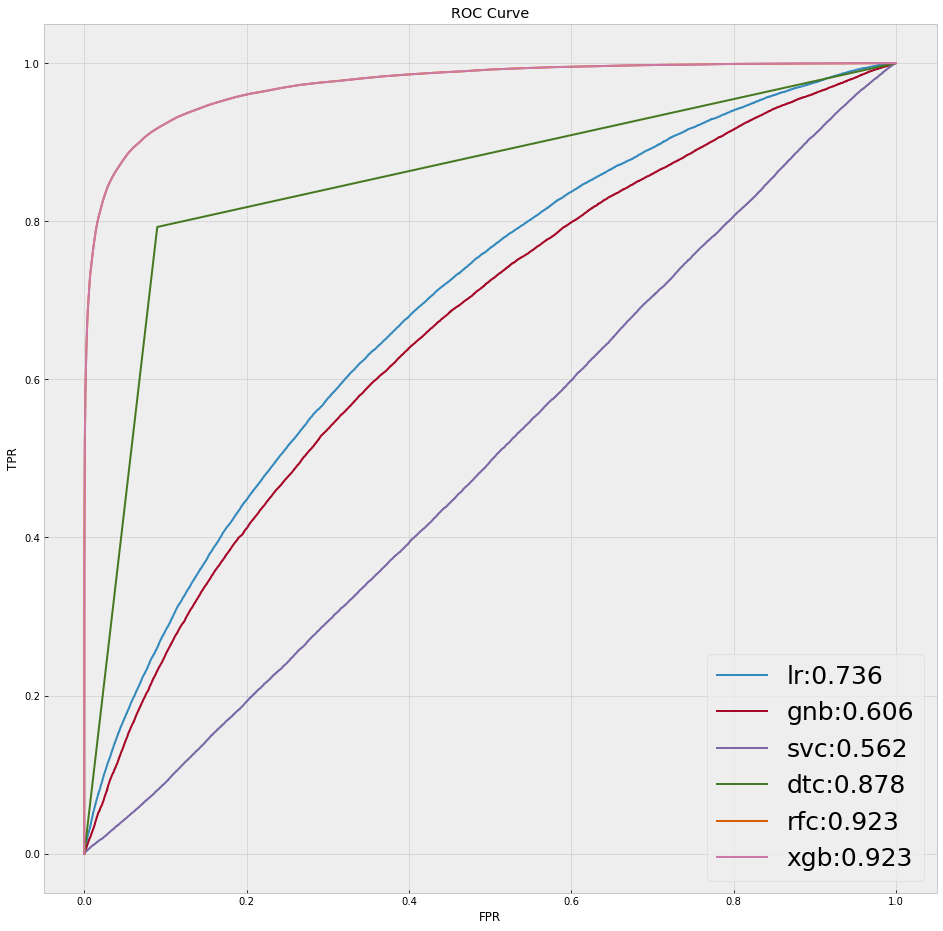

In [41]:
plt.style.use('bmh')
plt.figure(figsize=(16,16))

plt.plot(fpr_lr, tpr_lr, label='lr:%.3f' % score_lr)  # 逻辑回归
plt.plot(fpr_gnb,tpr_gnb,label='gnb:{0:.3f}'.format(score_gnb))         # 朴素贝叶斯
plt.plot(fpr_svc,tpr_svc,label='svc:{0:.3f}'.format(score_svc))         # 支持向量机
plt.plot(fpr_dtc,tpr_dtc,label='dtc:{0:.3f}'.format(score_dtc))         # 决策树
plt.plot(fpr_rfc,tpr_rfc,label='rfc:{0:.3f}'.format(score_rfc))         # 随机森林
plt.plot(fpr_rfc,tpr_rfc,label='xgb:{0:.3f}'.format(score_xgb))         # XGBoost

plt.legend(loc='lower right', prop={'size':25})
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.savefig('./images/roc.png',dpi=400, bbox_inches='tight')
plt.show()

# RFM与用户画像分析

## RFM分析
RFM模型，即为：
- (Rencency):最近一次消费
- F(Frequency):消费频率
- M(Monetary):消费金额
由于本数据集并没有直接给出这三个指标，经过分析，选择选择`lasthtlordergap`(距离上次下单时长）、和经过PCA降维处理的`ordernum_1_year`（用户年订单数）、`consume_level`（消费能力水平）分别作为R、F、M值，从而对我们的用户群体进行分群

In [42]:
rfm_features = ['lasthtlordergap', 'ordernum_1_year', 'consume_level']
rfm = rawdf[rfm_features]

# 归一化（用于给RFM值打分）
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(rfm)
rfm = pd.DataFrame(scaler.transform(rfm), columns=['recency', 'frequency','monetary'] )

# 分箱
rfm['R'] = pd.qcut(rfm['recency'], 2)
rfm['F'] = pd.qcut(rfm['frequency'], 2)
rfm['M'] = pd.qcut(rfm['monetary'], 2)

# 根据分箱情况进行编码，二分类可以直接用标签编码方式
from sklearn.preprocessing import LabelEncoder

rfm['R'] = LabelEncoder().fit(rfm['R']).transform(rfm['R'])
rfm['F'] = LabelEncoder().fit(rfm['F']).transform(rfm['F'])
rfm['M'] = LabelEncoder().fit(rfm['M']).transform(rfm['M'])


#定义RFM模型，需要特别注意的是，R值代表距离上次消费时间间隔，值越小客户价值越高，与F和M值正好相反。
def get_label(r,f,m):
    if (r==0)&(f==1)&(m==1):
        return 'High Value Customers'   #'高价值客户'
    if (r==1)&(f==1)&(m==1):
        return 'Main Keeping Customers' #'重点保持客户'
    if((r==0)&(f==0)&(m==1)):
        return 'Main Developing Customers'  #'重点发展客户'
    if (r==1)&(f==0)&(m==1):
        return 'Main Retaining Customers'   #'重点挽留客户'
    if (r==0)&(f==1)&(m==0):
        return 'General Value Customers'    #'一般价值客户'
    if (r==1)&(f==1)&(m==0):
        return 'General Keeping Customers'  #'一般保持客户'
    if (r==0)&(f==0)&(m==0):
        return 'Genera Developing Customers'    #'一般发展客户'
    if (r==1)&(f==0)&(m==0):
        return 'Potential Customers'    #'潜在客户'
    
def RFM_convert(df):
    df['Label'] = df.apply(lambda x:get_label(x['R'], x['F'], x['M']), axis=1)
    
    df['R'] = np.where(df['R']==0, 'High', 'Low')
    df['F'] = np.where(df['F']==1, 'High', 'Low')
    df['M'] = np.where(df['M']==1, 'High', 'Low')
    
    return df[['R','F','M','Label']]
    

rfm0 = RFM_convert(rfm)
rfm0.head()

,R,F,M,Label
0,High,High,Low,General Value Customers
1,High,Low,Low,Genera Developing Customers
2,High,Low,Low,Genera Developing Customers
3,High,Low,Low,Genera Developing Customers
4,High,Low,Low,Genera Developing Customers


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


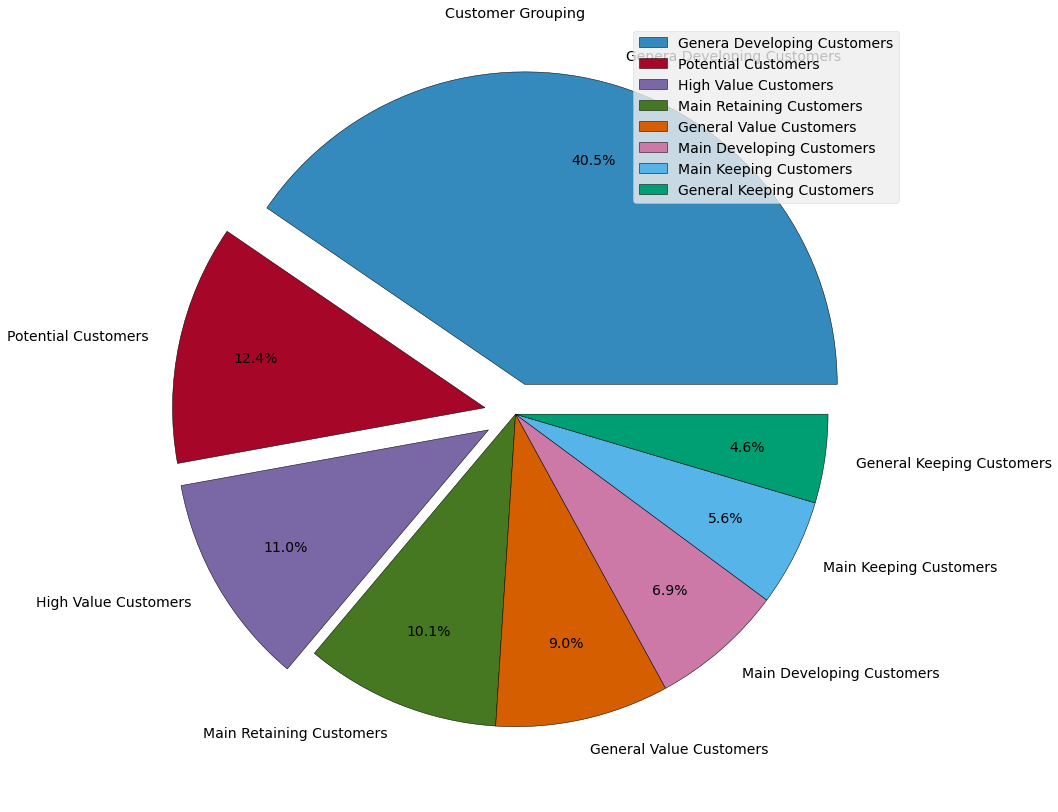

In [43]:
# 可视化
# label_cnt = rfm0.groupby('Label').size()
label_cnt = rfm0['Label'].value_counts().values
labels = rfm0['Label'].value_counts().index
explode=[0.1,0.1,0.1,0,0,0,0,0]

plt.figure(figsize=(14,18))
# colors=['orangered','lightsalmon','sienna','seashell','chocolate','peru','sandybrown','peachpuff']
plt.pie(label_cnt, labels=labels,radius=1, explode=explode, autopct='%.1f%%',pctdistance=0.75,
        wedgeprops={'linewidth':0.5, 'edgecolor':'black'}, 
        textprops={'fontsize':14, 'color':'black'})
# plt.pie([1],radius=0.6,colors='w')
plt.title("Customer Grouping")
plt.legend(labels, fontsize=14, loc='best')
plt.savefig('./images/customer_grouping.png', dpi=400, bbox_inches='tight')
plt.show()

- 大部分客户是一般发展客户
- 潜在客户占比12.45%，这类客户有待开发；
- 高价值客户11%，重点保持客户5.6%，重点发展客户6.9%，这些都是要重点关注的客户群体

## Kmeans构建用户画像
上面RFM模型只用到数据集中`lasthtlordergap`、`ordernum_1_year`、`consuming_level`三个直接相关变量，但这些变量并不能完全涵盖用户特征，所以，接下来用K-Means聚类的方法引入其他变量进一步探究分析，观察不同类别客户的特征。

### 查看重要特征

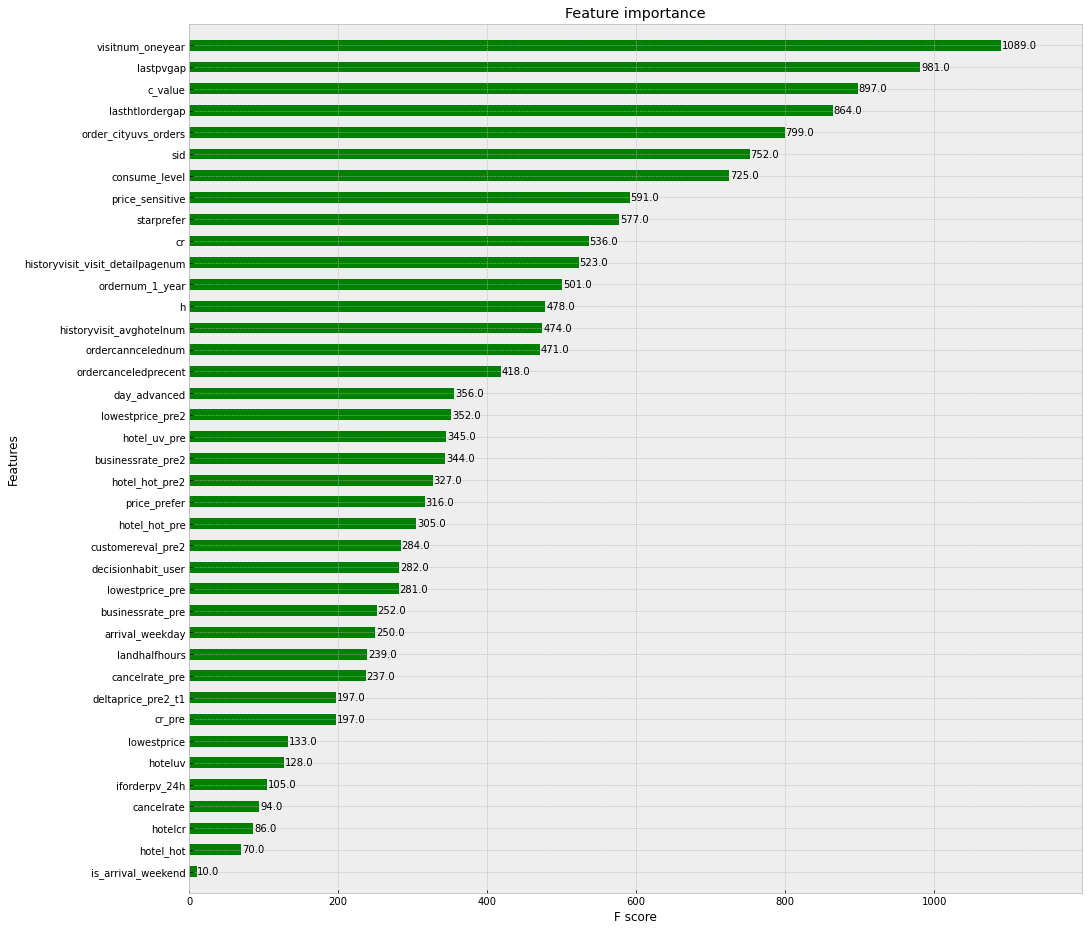

In [44]:
from xgboost import plot_importance

# 解决f特征名字
def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    for i, feat in enumerate(features):
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
    outfile.close()
create_feature_map(x.columns)

fig, ax=plt.subplots(figsize=(16, 16))
plot_importance(bst, height=0.5, ax=ax, max_num_features=40, color='green', fmap='./xgb.fmap')
plt.savefig('./images/feature_importance.png')
plt.show()

看出重要特征超过2000以上的有：`h`, `cr`, `visit_num`, `visit_oneyear`, `consume_level`, `price_prefer`, `businessrate_pre2`, `hoteluv`, `starprefer`，后面分析时也会重点查看这些特征的影响

### K-means聚类

K-Means算法是一种基于划分的无监督聚类算法，它以 k 为参数，把 n 个数据对象分成 k 个簇，使簇内具有较高的相似度，而簇间的相似度较低。

由上文的特征相关性分析，我们对相关性高的特征进行降维

In [45]:
visit_num=['decisionhabit_user', 'historyvisit_avghotelnum']        #用户访问数
pca=PCA(n_components=1)
rawdf['visit_num']=pca.fit_transform(rawdf[visit_num])
rawdf.drop(visit_num, axis=1, inplace=True)

# 选取出几个刻画用户的重要指标
user_feature = ['ordercanncelednum', 'ordercanceledprecent', 'consume_level', 'starprefer', 'lasthtlordergap', 'lastpvgap', 'h', 'sid', 
'c_value', 'landhalfhours', 'price_sensitive', 'price_prefer', 'day_advanced', 'ordernum_1_year', 'visit_num']
user_attributes=rawdf[user_feature]
# user_attributes.head(30).T

# 数据标准化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(user_attributes)
user_attributes = scaler.transform(user_attributes)

# 对选出的关键特征k-means聚类，来做用户画像
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=3)  
Kmeans.fit(user_attributes)
k_char = Kmeans.cluster_centers_  # 得到每个分类的质心

persons = pd.DataFrame(k_char.T, index=user_feature,  columns=['Class 0','Class 1','Class 2'] )

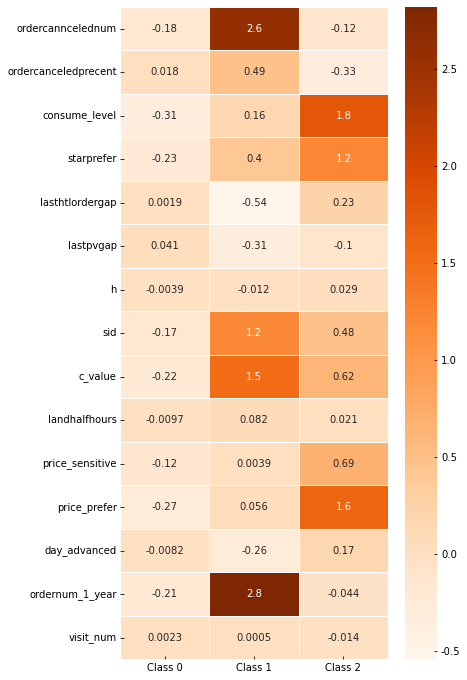

In [46]:
plt.figure(figsize=(6, 12))
sns.heatmap(persons, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap='Oranges')
plt.savefig('./images/user_portrait_table.png',dpi=400, bbox_inches='tight')
plt.show()

从热力图可以看出：
- 1类用户消费水平（consume_level）和价格偏好（price_prefer）为三类用户中最高，同时较高的星级偏好反应出该类型用户对酒店有一定的质量要求，但同时该类型用户对价格的敏感度(price_sensitive)最高，最近一年下单频率是三类用户中最低的，上次消费时间间隔很久，他们一般会提前较早的时间预定酒店，并且订单取消率是三类用户中最低的，因此可以推测该类型用户为旅游客户，结合sid来看他们是高价值客户。
- 2类用户最近一年下单频率（ordernum_1_year）为三类用户中最高，但同时该类型用户的订单取消率也是最高的。他们的消费水平一般，对酒店的偏好也一般，但对价格敏感度不高，一般不会提前预定酒店。他们使用携程浏览酒店的次数较高，基本是老用户，并且用户价值是三类用户中中等的，因此将2类用户定义为中等价值客户。
- 0类用户的可视化数据基本是白色的，客户消费水平和使用频率都是最低的，因此将这类用户归为“低价值用户”，但sid反映出他们大部分是新客户。

对三种客户占比进行可视化

<Figure size 648x648 with 0 Axes>

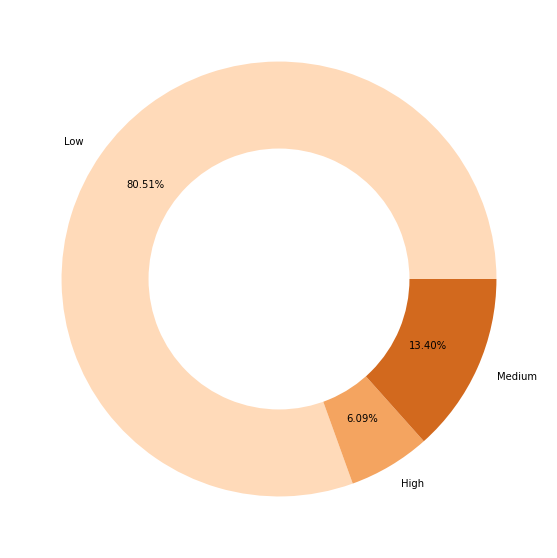

In [47]:
plt.figure(figsize=(9, 9))

class_k=list(Kmeans.labels_)                          # 每个类别的用户个数
percent=[class_k.count(0)/len(user_attributes),
         class_k.count(1)/len(user_attributes),
         class_k.count(2)/len(user_attributes)]       # 每个类别用户个数占比

fig, ax = plt.subplots(figsize=(10,10))
colors=['peachpuff','sandybrown','chocolate']
types=['Low','High','Medium']


ax.pie(percent,radius=1,autopct='%.2f%%',pctdistance=0.75, colors=colors, labels=types)
ax.pie([1], radius=0.6, colors='w')
plt.savefig('./images/User_portrait_ratio.png', dpi=400, bbox_inches='tight')
plt.show()

从饼图看出，高价值用户占比13.26%；中等价值用户占比偏低，仅有6.19%，需要扩大中等价值用户群体，同时，低价值用户占比高达80.55%，其中很多是新用户，需要把这些新用户转化。

### 用户画像分析
**高价值用户分析**
高价值用户特点：消费水平高、客户价值较大、追求高品质的酒店（有星级偏好）,老客户居多，他们对酒店价格很敏感，一般会提前较早的时间预定酒店，订单取消率是三类用户中最低的，但最近一年下单频率也是最低的，上次消费时间间隔很久。因此可以合理推断，这类用户预定酒店的目的可能多为出门旅行。

针对这部分客户，我们需要：
- 在节假日前两三周定期尽可能推送较多的酒店，因为此类用户通常比较喜欢浏览、综合考虑
- 推荐的酒店品质可以高一些，同时价格要具有吸引力。再推荐当地旅游资讯，吸引用户关注，因为这类用户旅游出行的概率较大，然后通过用户的点击行为优化酒店推荐的准确度（在价格、星级、地点、类别方面）
- 和景区酒店代理商合作，针对此类用户定制个性化推荐，多推荐性价比高的酒店

**中等价值分析**
中等价值客户特点：消费水平一般，对酒店的偏好也一般，基本是老客户，用户价值大，同时对价格敏感度不高。他们经常浏览酒店信息，24小时登录时长较长，因此可能再对比价格选择酒店。他们经常下单预定酒店，但一般不会提前，同时订单取消率也很高。可以合理推测改类型用户的商务属性比较重，他们可能需要经常出差，一般不会提前太久预定酒店，出差行程可能有变动因此可能取消订单。

这部分客户仅占6.19%，因此针对这部分客户，我们需要：
- 多推荐价格实惠的商务酒店来吸引用户，并结合用户画像进行建模优化的推荐；
- 定期推送平台信息，持续维护用户；

**低价值客户分析**
低价值客户特点：最明显的特征就是浏览次数和浏览时长都很低，消费水平、用户价值都是最低的，浏览次数和订单都很低，这部分用户可能偶尔才在携程上预定酒店，几乎没有消费过，对酒店品质几乎不追求，因此重点在于激活用户。同时，由于sid值很低，说明大部分是新客户刚注册或者注册后就不使用了的。

由于低价值客户占比高达80%，因此需要促进改用户群体的转化：

- 对于长久未登录的用户，可以通过信息推送来提醒、挽回用户，并发放优惠券来刺激消费；
- 由于新用户，他们属于潜在客户，因此建议把握用户初期体验（如初期消费折扣活动、打卡活动等），还可以定期推送实惠的酒店给此类用户，以培养用户的消费习惯为主。
- 推送的内容也要引导用户转化，推荐的内容可以多为大减价、大酬宾、跳楼价之类的；
- 初期用户画像数据较少的时候，酒店推荐可以结合当季热门酒店、热门资讯、附近的人较多选择的酒店等，然后逐渐完善用户画像。